In [1]:
import cv2
import numpy as np

In [2]:
# Add text overlay into video frame
def add_text_to_frame(frame, text, position=(30, 30), font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=0.2, color=(0, 255, 0), thickness=2):
    """
    Add text to a frame.

    Parameters:
    - frame (numpy.ndarray): Input frame.
    - text (str): Text to be added to the frame.
    - position (tuple): Position of the text (x, y).
    - font (int): Font type.
    - font_scale (float): Font scale.
    - color (tuple): Text color (B, G, R).
    - thickness (int): Text thickness.

    Returns:
    - numpy.ndarray: Frame with added text.
    """
    frame_with_text = frame.copy()
    cv2.putText(frame_with_text, text, position, font, font_scale, color, thickness)
    return frame_with_text

In [3]:
import numpy as np

def calculate_angle(line1, line2):
    # Convert lines to numpy arrays
    line1 = np.array(line1)
    line2 = np.array(line2)

    # Calculate the vectors corresponding to the lines
    vector1 = line1[1] - line1[0]
    vector2 = line2[1] - line2[0]

    # Calculate the dot product of the vectors
    dot_product = np.dot(vector1, vector2)

    # Calculate the cross product of the vectors
    cross_product = np.cross(vector1, vector2)

    # Calculate the magnitudes of the vectors
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)

    # Calculate the cosine of the angle between the vectors
    cosine_theta = dot_product / (magnitude1 * magnitude2)

    # Determine the sign of the cross product to determine the direction
    angle_radians = np.arccos(cosine_theta)

    # Convert the angle to degrees
    angle_degrees = np.degrees(angle_radians)

    # Check the cross product sign for the alternative order of lines
    alt_cross_product = np.cross(vector2, vector1)
    alt_angle_radians = np.arccos(cosine_theta)

    # Convert the alternative angle to degrees
    alt_angle_degrees = np.degrees(alt_angle_radians)

    # Choose the smaller angle between the two orders
    if alt_cross_product < 0:
        angle_degrees = alt_angle_degrees

    # Ensure the angle is in the range [0, 180] degrees
    # angle_degrees = angle_degrees % 180

    return angle_degrees

# Example usage with random point order:
import random

# Generate random points for lines
point1_line1 = (random.uniform(0, 10), random.uniform(0, 10))
point2_line1 = (random.uniform(0, 10), random.uniform(0, 10))
point1_line2 = (random.uniform(0, 10), random.uniform(0, 10))
point2_line2 = (random.uniform(0, 10), random.uniform(0, 10))

# Create lines from random points
line1 = [point1_line1, point2_line1]
line2 = [point1_line2, point2_line2]

angle = calculate_angle(line1, line2)
print(f"Angle between lines: {angle} degrees")


Angle between lines: 155.19471129368281 degrees


In [4]:
def segment_marker_by_color(frame_tmp):
    # Inut mus by frame in clielab color model but from OPENCV function
    marker_blue = (frame_tmp[:, :, 1] > 140) & (frame_tmp[:, :, 1] < 170) & (frame_tmp[:, :, 2] > 160)
    marker_pink = (frame_tmp[:, :, 1] > 175) & (frame_tmp[:, :, 2] < 80)
    marker_green = (frame_tmp[:, :, 1] < 120) & (frame_tmp[:, :, 2] > 130)
    marker_yellow = (frame_tmp[:, :, 1] > 80) & (frame_tmp[:, :, 1] < 120) & (frame_tmp[:, :, 2] > 90) & (frame_tmp[:, :, 2] < 110)
    return marker_blue, marker_pink, marker_green, marker_yellow

In [5]:

# Segmenting colored points
marker_blue,marker_pink,marker_green,marker_yellow = segment_marker_by_color(frameLab)

# Create list of mask (on each mask are represented two points
masks = np.stack([marker_blue,marker_pink,marker_green,marker_yellow], axis=0)



point_per_frame = []
for mask, thr, color, line_pad in zip(masks, tthreshold_area_size, colors, line_padding):
    # print(xmasks)
    mask = np.uint8(mask.copy())
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

    filtered_regions = [index for index, stat in enumerate(stats[1:]) if stat[4] >= thr]

    point_per_mask = []
    for idx, index in enumerate(filtered_regions):
        # Access region properties from the stats array
        left, top, width, height, area = stats[index + 1]
        # Create a visualization of the centroid using a circle
        centroid_x, centroid_y = int(left + width / 2), int(top + height / 2)

        point = (centroid_x, centroid_y)
        point_per_mask.append(point)
        # Print rectangles

        cv2.circle(frame_work, (centroid_x, centroid_y), radius=idx*10 + 10, color=color, thickness=5)
        line_length = 1



    direction_vector = calculate_vector(point_per_mask[1],point_per_mask[0])
    point1 = (int(point_per_mask[1][0] - line_pad * direction_vector[0]),
              int(point_per_mask[1][1] - line_pad * direction_vector[1]))

    point2 = (int(point_per_mask[0][0] + line_pad * direction_vector[0]),
              int(point_per_mask[0][1] + line_pad * direction_vector[1]))
    cv2.line(frame_work, point1, point2, color, 3)


    point_per_frame.append(point_per_mask)

line1 = point_per_frame[0]
line2 = point_per_frame[1]
angle = calculate_angle(line1, line2)
frame_work = add_text_to_frame(frame_work, "ANGLE 0: {}".format(angle), position=(1000,810), font_scale=0.5, thickness=2,color=(255,255,0))
line1 = point_per_frame[1]
line2 = point_per_frame[2]
angle = calculate_angle(line1, line2)
frame_work = add_text_to_frame(frame_work, "ANGLE 1: {}".format(angle), position=(1000,830), font_scale=0.5, thickness=2,color=(255,255,0))
line1 = point_per_frame[2]
line2 = point_per_frame[3]
angle = calculate_angle(line1, line2)
frame_work = add_text_to_frame(frame_work, "ANGLE 2: {}".format(angle), position=(1000,850), font_scale=0.5, thickness=2,color=(255,255,0))#%%
import cv2
import numpy as np

NameError: name 'frameLab' is not defined

In [ ]:
# Add text overlay into video frame
def add_text_to_frame(frame, text, position=(30, 30), font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=0.2, color=(0, 255, 0), thickness=2):
    """
    Add text to a frame.

    Parameters:
    - frame (numpy.ndarray): Input frame.
    - text (str): Text to be added to the frame.
    - position (tuple): Position of the text (x, y).
    - font (int): Font type.
    - font_scale (float): Font scale.
    - color (tuple): Text color (B, G, R).
    - thickness (int): Text thickness.

    Returns:
    - numpy.ndarray: Frame with added text.
    """
    frame_with_text = frame.copy()
    cv2.putText(frame_with_text, text, position, font, font_scale, color, thickness)
    return frame_with_text

In [6]:
# OLD CALCULATION

# import numpy as np
#
# def calculate_angle(line1, line2):
#     # Convert lines to numpy arrays
#     line1 = np.array(line1)
#     line2 = np.array(line2)
#
#     # print(f"line1 {line1}")
#     # print(f"line2 {line2}")
#
#
#     # Calculate the vectors corresponding to the lines
#     vector1 = line1[1] - line1[0]
#     vector2 = line2[1] - line2[0]
#
#
#     # print(f"vector1 {vector1}")
#     # print(f"vector2 {vector2}")
#
#
#     # Calculate the dot product of the vectors
#     dot_product = np.dot(vector1, vector2)
#
#
#
#     # Calculate the cross product of the vectors
#     cross_product = np.cross(vector1, vector2)
#
#
#     vector1 = line1[0] - line1[1]
#     vector2 = line2[0] - line2[1]
#     # Calculate the magnitudes of the vectors
#     magnitude1 = np.linalg.norm(vector1)
#     magnitude2 = np.linalg.norm(vector2)
#
#     dot_product = np.dot(vector1, vector2)
#     # Calculate the cross product of the vectors
#     cross_product = np.cross(vector1, vector2)
#
#     cosine_theta = dot_product / (magnitude1 * magnitude2)
#
#     # Determine the sign of the cross product to determine the direction
#     angle_radians = np.arccos(cosine_theta)
#
#     if dot_product > 0:
#         # Convert the angle to degrees
#         angle_degrees = 180 - np.degrees(angle_radians)
#
#     else:
#         # Convert the angle to degrees
#         angle_degrees = np.degrees(angle_radians)
#
#     if dot_product > 0 and cross_product < 0:
#         angle_degrees = 360 - angle_degrees
#
#
#     return angle_degrees
#
# # Example usage with random point order:
# import random
#
# # # Generate random points for lines
# # point1_line1 = (random.uniform(0, 10), random.uniform(0, 10))
# # point2_line1 = (random.uniform(0, 10), random.uniform(0, 10))
# # point1_line2 = (random.uniform(0, 10), random.uniform(0, 10))
# # point2_line2 = (random.uniform(0, 10), random.uniform(0, 10))
# #
# # # Create lines from random points
# # line1 = [point1_line1, point2_line1]
# # line2 = [point1_line2, point2_line2]
# #
# # angle = calculate_angle(line1, line2)
# # print(f"Angle between lines: {angle} degrees")


In [7]:
def segment_marker_by_color(frame_tmp):
    # Input must be a frame in the cielab color model from the OpenCV function

    # Extract color channels
    L_channel = frame_tmp[:, :, 0]
    a_channel = frame_tmp[:, :, 1]
    b_channel = frame_tmp[:, :, 2]

    # Color segmentation using NumPy array operations
    marker_blue = (a_channel > 140) & (a_channel < 170) & (b_channel > 160)
    marker_pink = (a_channel > 175) & (b_channel < 80)
    marker_green = (a_channel < 120) & (b_channel > 130)
    marker_yellow = (a_channel > 80) & (a_channel < 120) & (b_channel > 90) & (b_channel < 110)

    return marker_blue, marker_pink, marker_green, marker_yellow


In [8]:
# OLD MAON
# def main_function(frame, swap):
#
#     cielab_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2Lab)
#     # Segmenting colored points
#     marker_blue,marker_pink,marker_green,marker_yellow = segment_marker_by_color(cielab_frame)
#
#     # plt.imshow(frame)
#     # Create list of mask (on each mask are represented two points
#     masks = np.stack([marker_blue,marker_pink,marker_green,marker_yellow], axis=0)
#     colors_name = ["blue", "pink", "green", "yellow"]
#
#     point_per_frame = []
#     for mask, thr, color, line_pad, color_name in zip(masks, tthreshold_area_size, colors, line_padding, colors_name):
#         mask = np.uint8(mask.copy())
#         num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)
#
#         filtered_regions = [index for index, stat in enumerate(stats[1:]) if stat[4] >= thr]
#
#         point_per_mask = []
#         for idx, index in enumerate(filtered_regions):
#             # Access region properties from the stats array
#             left, top, width, height, area = stats[index + 1]
#             # Create a visualization of the centroid using a circle
#             centroid_x, centroid_y = int(left + width / 2), int(top + height / 2)
#
#             point = (centroid_x, centroid_y)
#             point_per_mask.append(point)
#             # Print rectangles
#
#
#             # line_length = 1
#         #
#         # print(f"COLOR {color_name}")
#         # print(f"{point_per_mask[0][0]} {point_per_mask[1][0]} |{point_per_mask[0][1]} {point_per_mask[1][1]} ")
#         # if swap:
#         #     if point_per_mask[0][0] > point_per_mask[1][0] and point_per_mask[0][1] < point_per_mask[1][1]:
#         #         print("YES")
#         #         temp = point_per_mask[0]
#         #         point_per_mask[0] = point_per_mask[1]
#         #         point_per_mask[1] = temp
#
#         cv2.circle(frame, (point_per_mask[0][0], point_per_mask[0][1]), radius=idx*10, color=color, thickness=5)
#         cv2.circle(frame, (point_per_mask[1][0], point_per_mask[1][1]), radius=idx*10 + 10, color=color, thickness=5)
#
#
#         direction_vector = calculate_vector(point_per_mask[1],point_per_mask[0])
#         point1 = (int(point_per_mask[1][0] - line_pad * direction_vector[0]),
#                   int(point_per_mask[1][1] - line_pad * direction_vector[1]))
#
#         point2 = (int(point_per_mask[0][0] + line_pad * direction_vector[0]),
#                   int(point_per_mask[0][1] + line_pad * direction_vector[1]))
#         cv2.line(frame, point1, point2, color, 3)
#
#
#
#         point_per_frame.append(point_per_mask)
#     # print(f" ANGLE 0")
#     line1 = point_per_frame[0]
#     line2 = point_per_frame[1]
#     # line1 = point1
#     # line2 = point2
#     angle = calculate_angle(line1, line2)
#     frame = add_text_to_frame(frame, "ANGLE 0: {}".format(int(angle)), position=(1000,810), font_scale=0.5, thickness=2,color=(255,255,0))
#
#
#
#     # print(f"SWAP ANGLE 1")
#     line1 = point_per_frame[2]
#     line2 = point_per_frame[1]
#
#     # print(f" ANGLE 1")
#     line1 = point_per_frame[1]
#     line2 = point_per_frame[2]
#     angle = calculate_angle(line1, line2)
#     frame = add_text_to_frame(frame, "ANGLE 1: {}".format(int(angle)), position=(1000,830), font_scale=0.5, thickness=2,color=(255,255,0))
#
#
#     # print(f" ANGLE 2")
#     line1 = point_per_frame[2]
#     line2 = point_per_frame[3]
#     angle = calculate_angle(line1, line2)
#     frame = add_text_to_frame(frame, "ANGLE 2: {}".format(int(angle)), position=(1000,850), font_scale=0.5, thickness=2,color=(255,255,0))
#     return frame


In [9]:
def main_function(frame, swap):
    # Convert the input frame to the CIELAB color space
    cielab_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2Lab)

    # Segment markers by color in the CIELAB color space
    marker_blue, marker_pink, marker_green, marker_yellow = segment_marker_by_color(cielab_frame)

    # Create a stack of masks for each color marker
    masks = np.stack([marker_blue, marker_pink, marker_green, marker_yellow], axis=0)

    # Define color names for visualization
    colors_name = ["blue", "pink", "green", "yellow"]

    # Initialize a list to store points per frame
    point_per_frame = []

    # Set the line padding value
    line_pad = 5  # Adjust this value as needed

    # Initialize the direction vector for the first line
    direction_vector_0_1 = None

    # Iterate over each color marker
    for mask, thr, color, color_name, direction_vector in zip(
            masks, tthreshold_area_size, colors, colors_name, [direction_vector_0_1, None, None, None]
    ):
        # Convert the mask to uint8
        mask = np.uint8(mask)

        # Find connected components in the mask
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

        # Filter regions based on area threshold
        filtered_regions = [index for index, stat in enumerate(stats[1:]) if stat[4] >= thr]

        # Initialize a list to store points per mask
        point_per_mask = []

        # Iterate over filtered regions in the mask
        for idx, index in enumerate(filtered_regions):
            # Access region properties from the stats array
            left, top, width, height, area = stats[index + 1]

            # Calculate the centroid
            centroid_x, centroid_y = int(left + width / 2), int(top + height / 2)

            # Append the centroid to the list of points for the mask
            point_per_mask.append((centroid_x, centroid_y))

        # Visualize circles for each point in the mask
        for idx, point in enumerate(point_per_mask):
            cv2.circle(frame, (point[0], point[1]), radius=idx * 10, color=color, thickness=5)

        # Visualize circles for each point with increased radius
        for idx, point in enumerate(point_per_mask):
            cv2.circle(frame, (point[0], point[1]), radius=idx * 10 + 10, color=color, thickness=5)

        # If direction vector is not initialized, calculate it from the first two points
        if direction_vector is None:
            direction_vector = calculate_vector(point_per_mask[1], point_per_mask[0])

        # Calculate points for the line based on the direction vector and line padding
        point1 = (
            int(point_per_mask[1][0] - line_pad * direction_vector[0]),
            int(point_per_mask[1][1] - line_pad * direction_vector[1]),
        )
        point2 = (
            int(point_per_mask[0][0] + line_pad * direction_vector[0]),
            int(point_per_mask[0][1] + line_pad * direction_vector[1]),
        )

        # Visualize the line connecting the two points
        cv2.line(frame, point1, point2, color, 3)

        # Append the points for the current mask to the list of points per frame
        point_per_frame.append(point_per_mask)

    # Calculate angles between consecutive lines
    angle_0 = calculate_angle(point_per_frame[0], point_per_frame[1])
    angle_1 = calculate_angle(point_per_frame[1], point_per_frame[2])
    angle_2 = calculate_angle(point_per_frame[2], point_per_frame[3])

    # Add text annotations to the frame with calculated angles
    frame = add_text_to_frame(frame, "ANGLE 0: {}".format(int(angle_0)), position=(1000, 810), font_scale=0.5, thickness=2, color=(255, 255, 0))
    frame = add_text_to_frame(frame, "ANGLE 1: {}".format(int(angle_1)), position=(1000, 830), font_scale=0.5, thickness=2, color=(255, 255, 0))
    frame = add_text_to_frame(frame, "ANGLE 2: {}".format(int(angle_2)), position=(1000, 850), font_scale=0.5, thickness=2, color=(255, 255, 0))

    return frame, angle_0, angle_1, angle_2


In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

[ WARN:0@11.277] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@11.277] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin0 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@11.277] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@11.277] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664

NameError: name 'tthreshold_area_size' is not defined

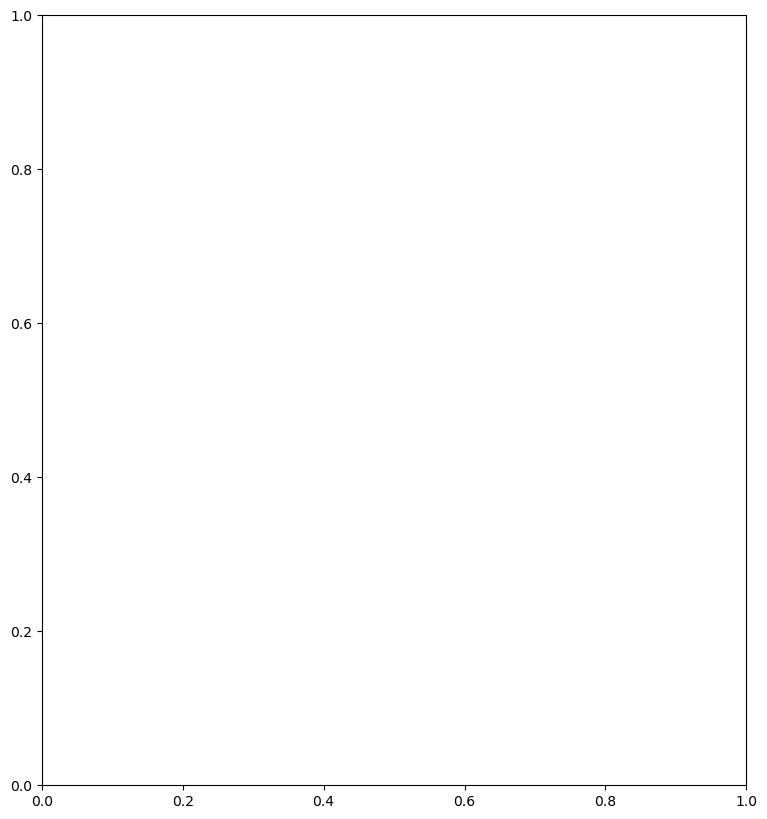

In [11]:
cap = cv2.VideoCapture("../IMG_7102.MOV")
cap.set(cv2.CAP_PROP_POS_FRAMES, 500)
ret, frame = cap.read()
frame_work  = frame.copy()
frame_work2  = frame.copy()




plt.figure(figsize= (20, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(main_function(frame_work, False) , cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(main_function(frame_work2, True) , cv2.COLOR_BGR2RGB))



In [ ]:
cap = cv2.VideoCapture("../IMG_7102.MOV")
# Get the total number of frames in the video
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
length

[ WARN:0@12.524] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@12.524] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin1 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@12.525] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@12.525] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664

NameError: name 'tthreshold_area_size' is not defined

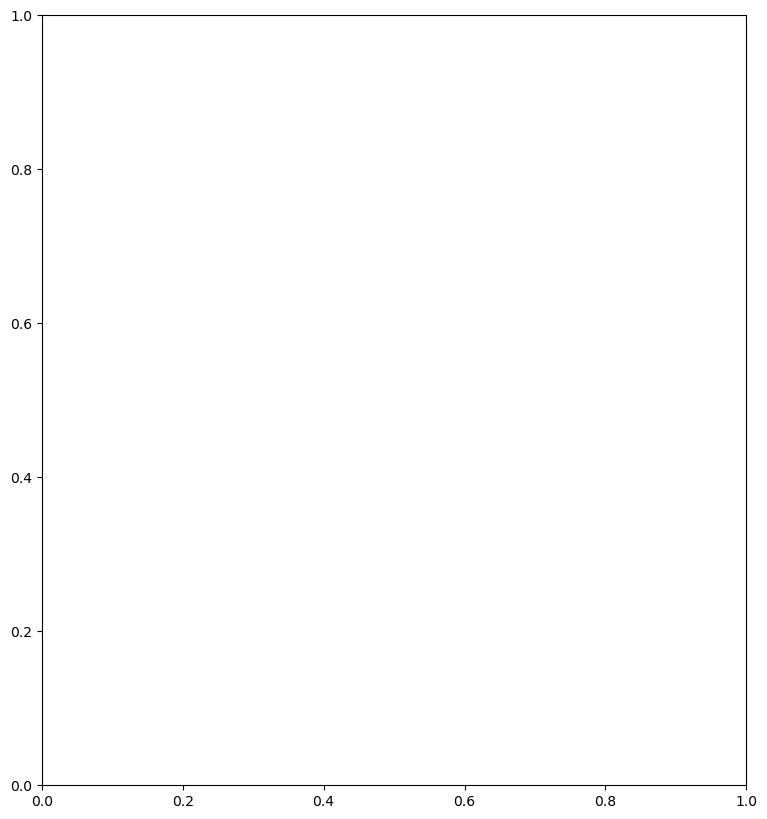

In [12]:
cap = cv2.VideoCapture("../IMG_7102.MOV")
cap.set(cv2.CAP_PROP_POS_FRAMES, 1050)
ret, frame = cap.read()
frame_work  = frame.copy()
frame_work2  = frame.copy()




plt.figure(figsize= (20, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(main_function(frame_work, False) , cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(main_function(frame_work2, True) , cv2.COLOR_BGR2RGB))



In [13]:
# cap = cv2.VideoCapture("../IMG_7102.MOV")
# cap.set(cv2.CAP_PROP_POS_FRAMES, 500)
# ret, frame = cap.read()
# frame_work  = frame.copy()
# frame_work = main_function(frame_work, False)
# plt.figure(figsize=(20,20))
# plt.imshow(frame_work)

In [14]:
# cap = cv2.VideoCapture("../IMG_7102.MOV")
# cap.set(cv2.CAP_PROP_POS_FRAMES, 500)
# ret, frame = cap.read()
# frame_work  = frame.copy()
# frame_work = main_function(frame_work, False)
# plt.figure(figsize=(20,20))
# plt.imshow(frame_work)

In [15]:
# cap = cv2.VideoCapture("../IMG_7102.MOV")
# cap.set(cv2.CAP_PROP_POS_FRAMES, 1000)
# ret, frame = cap.read()
# frame_work  = frame.copy()
# frame_work = main_function(frame_work)
# plt.figure(figsize=(20,20))
# plt.imshow(frame_work)

In [16]:
import time

In [17]:
from skimage.measure import label, regionprops
from skimage.morphology import dilation, disk
def calculate_vector(point1, point2):
    return np.array(point2) - np.array(point1)

# Open the video file
cap = cv2.VideoCapture("../IMG_7102.MOV")
frame_shift = 500
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_shift)
# Set the frames per second for video capture
# cap.set(cv2.CAP_SE, 300)
if not cap.isOpened():
    print("Error: Could not open the video file.")
    exit()

# Get the frames per second (fps) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Create a window to display the frames
cv2.namedWindow('Video Preview', cv2.WINDOW_NORMAL)

# Constants
font_scale = 1
text_position_cnt = (100, 100)
text_position_time = (100, 120)

# Calculate vector once outside the loop
vector_calc_point1 = np.array([0, 0])  # Replace with actual point
vector_calc_point2 = np.array([0, 0])  # Replace with actual point

cnt = frame_shift

measure = []
while True:
    strt = time.time()
    ret, frame = cap.read()

    if not ret:
        break

    # Use the original frame instead of creating a copy
    frame, angle_0, angle_1, angle_2  = main_function(frame, False)

    # Add text to the frame
    frame = add_text_to_frame(frame, str(cnt), position=text_position_cnt, font_scale=font_scale)

    # Calculate and add time information
    end = time.time()
    frame = add_text_to_frame(frame, str(end - strt), position=text_position_time, font_scale=font_scale)
    measure.append([cnt, angle_0,angle_1,angle_2])
    cv2.imshow('Video Preview', frame)

    cnt += 1
    if cv2.waitKey(int(1000 / 1000)) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()
measure

[ WARN:0@16.126] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@16.126] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin2 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@16.127] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@16.127] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664

NameError: name 'tthreshold_area_size' is not defined

In [ ]:
fps

In [ ]:
measure

In [19]:
import pandas as pd


In [20]:
df_angle = pd.DataFrame(data=measure, columns=["frame", "angle_0", "angle_1", "angle_2"])
df_angle.to_csv("test_output.csv", index=False)
df_angle

NameError: name 'measure' is not defined

In [196]:
import numpy as np
import pandas as pd

# Constants
fps = 150
window_size = 10

# Calculate time in seconds
df_angle["time"] = df_angle["frame"] / fps

# Apply rolling mean for smoothing angles
angle_columns = ["angle_0", "angle_1", "angle_2"]
for column in angle_columns:
    df_angle[column] = df_angle[column].rolling(window=window_size).mean()

# Calculate delta_time and angular speeds
delta_time = np.diff(df_angle['time'])
angle_0_speed = np.diff(df_angle['angle_0'])
angle_1_speed = np.diff(df_angle['angle_1'])
angle_2_speed = np.diff(df_angle['angle_2'])

# Create a DataFrame for angular speeds
df_angle_speed = pd.DataFrame(data={
    "time": df_angle["time"][:-1],
    "delta_time": delta_time,
    "angle_0": angle_0_speed,
    "angle_1": angle_1_speed,
    "angle_2": angle_2_speed
})

# Assuming df_angle_speed is your DataFrame containing speed data
# Calculate acceleration by taking the derivative of speed
delta_time_speed = np.diff(df_angle_speed['time'])
acceleration_0 = np.diff(df_angle_speed['angle_0']) / delta_time_speed
acceleration_1 = np.diff(df_angle_speed['angle_1']) / delta_time_speed
acceleration_2 = np.diff(df_angle_speed['angle_2']) / delta_time_speed

# Create a DataFrame for accelerations
df_acceleration = pd.DataFrame(data={
    "time": df_angle["time"][:-2],  # Adjust the time index for acceleration
    "delta_time": delta_time_speed,
    "acceleration_0": acceleration_0,
    "acceleration_1": acceleration_1,
    "acceleration_2": acceleration_2
})



In [319]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df_angle_speed is your DataFrame containing angle and speed data
# Replace 'angle_column' and 'speed_column' with your actual column names
angle_column = "angle_0"  # Change this to the actual angle column name
speed_column = "angle_0"  # Change this to the actual speed column name
threshold = 0.1

# Calculate the 'move' column based on the threshold
df_angle_speed["move"] = np.abs(df_angle_speed[speed_column].rolling(window=5).mean()) > threshold

# Create a Line Graph using Plotly Express
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, shared_yaxes=True)

# Plot smoothed angle data
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].rolling(window=5).mean(),
                         mode='lines', name=f'Smoothed {angle_column}'))

# Create masks for positive and negative 'move' regions
positive_move_mask = (df_angle_speed["move"]) & (df_angle_speed[speed_column].rolling(window=5).mean() > 0)
negative_move_mask = (df_angle_speed["move"]) & (df_angle_speed[speed_column].rolling(window=5).mean() < 0)

# Add shaded regions for positive 'move' intervals
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].max() * positive_move_mask,
                         fill='toself', fillcolor='rgba(255, 0, 0, 0.2)', line=dict(color='rgba(255, 255, 255, 0)'),
                         name='Positive Move Region', showlegend=False))

# Add shaded regions for negative 'move' intervals
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].max() * negative_move_mask * -1,
                         fill='toself', fillcolor='rgba(0, 0, 255, 0.2)', line=dict(color='rgba(255, 255, 255, 0)'),
                         name='Negative Move Region', showlegend=False))

# Update layout
fig.update_layout(title_text=f'{angle_column} per frame with Move Regions')

# Show the plot
fig.show()


In [260]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df_angle_speed is your DataFrame containing angle and speed data
# Replace 'angle_columns' and 'speed_column' with your actual column names
angle_columns = ["angle_0", "angle_1", "angle_2"]  # Change this to the actual angle column names
speed_column = "angle_0"  # Change this to the actual speed column name
threshold = 0.1

# Calculate the 'move' column based on the threshold
df_angle_speed["move"] = np.abs(df_angle_speed[speed_column].rolling(window=5).mean()) > threshold

# Create a Line Graph using Plotly Express
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, shared_yaxes=True)

for angle_column in angle_columns:
    # Plot smoothed angle data
    fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].rolling(window=5).mean(),
                             mode='lines', name=f'Smoothed {angle_column}'))

# Create masks for positive and negative 'move' regions
positive_move_mask = (df_angle_speed["move"]) & (df_angle_speed[speed_column].rolling(window=5).mean() > 0)
negative_move_mask = (df_angle_speed["move"]) & (df_angle_speed[speed_column].rolling(window=5).mean() < 0)

# Add shaded regions for positive 'move' intervals
for angle_column in angle_columns:
    fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].max() * positive_move_mask,
                             fill='toself', fillcolor='rgba(255, 0, 0, 0.2)', line=dict(color='rgba(255, 255, 255, 0)'),
                             name=f'Positive Move Region - {angle_column}', showlegend=False))

# Add shaded regions for negative 'move' intervals
for angle_column in angle_columns:
    fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].max() * negative_move_mask * -1,
                             fill='toself', fillcolor='rgba(0, 0, 255, 0.2)', line=dict(color='rgba(255, 255, 255, 0)'),
                             name=f'Negative Move Region - {angle_column}', showlegend=False))

# Update layout
fig.update_layout(title_text=f'Angles per frame with Move Regions')

# Show the plot
fig.show()


In [400]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df_angle_speed is your DataFrame containing angle and speed data
# Replace 'angle_columns' and 'speed_columns' with your actual column names
angle_columns = ["angle_0", "angle_1", "angle_2"]  # Change this to the actual angle column names
speed_columns = ["angle_0", "angle_1", "angle_2"]  # Change this to the actual speed column names
threshold = 0.15
window = 5
closed = True
# un_closing
# Calculate the 'move' column based on the threshold for any angle's speed
df_angle_speed['average_speed'] = np.mean(df_angle_speed[speed_columns], axis=1)

# df_angle_speed["move"] = np.any(np.abs(df_angle_speed[speed_columns].rolling(window=window).mean()) > threshold, axis=1)

df_angle_speed["move"] = np.abs(df_angle_speed['average_speed'].rolling(window=window).mean())  > threshold

# Create a Line Graph using Plotly Express
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, shared_yaxes=True)

# Create masks for positive and negative 'move' regions
# positive_move_mask = (df_angle_speed["move"]) & (np.all(df_angle_speed[speed_columns].rolling(window=window).mean() > 0, axis=1))
# negative_move_mask = (df_angle_speed["move"]) & (np.all(df_angle_speed[speed_columns].rolling(window=window).mean() < 0, axis=1))

positive_move_mask = (df_angle_speed["move"]) & (df_angle_speed['average_speed'] > 0)
negative_move_mask = (df_angle_speed["move"]) &  (df_angle_speed['average_speed'] < 0)

# Calculate the average speed of the three angles
df_angle_speed["average_speed"] = df_angle_speed[speed_columns].mean(axis=1)

for angle_column in angle_columns:
    # Plot smoothed angle data
    fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].rolling(window=window).mean(),
                             mode='lines', name=f'Smoothed {angle_column}'))

# Add shaded regions for positive 'move' intervals
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].max() * positive_move_mask,
                         fill='toself', fillcolor='rgba(255, 0, 0, 0.2)',
                         line=dict(color='rgba(255, 255, 255, 0)'),
                         name=f'Positive Move Region - {angle_column}', showlegend=False))

# Add shaded regions for negative 'move' intervals
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].max() * negative_move_mask * -1,
                         fill='toself', fillcolor='rgba(0, 0, 255, 0.2)',
                         line=dict(color='rgba(255, 255, 255, 0)'),
                         name=f'Negative Move Region - {angle_column}', showlegend=False))

# Plot the average speed
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed['average_speed'].rolling(window=window).mean(),
                         mode='lines', name=f'Average Speed', line=dict(color='black')))

# Update layout
fig.update_layout(title_text=f'Angles per frame with Move Regions and Average Speed')

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df_angle_speed is your DataFrame containing angle and speed data
# Replace 'angle_columns' and 'speed_columns' with your actual column names
angle_columns = ["angle_0", "angle_1", "angle_2"]  # Change this to the actual angle column names
speed_columns = ["angle_0", "angle_1", "angle_2"]  # Change this to the actual speed column names
threshold = 0.15
window = 5
closed = True
# un_closing
# Calculate the 'move' column based on the threshold for any angle's speed
df_angle_speed['average_speed'] = np.mean(df_angle_speed[speed_columns], axis=1)

# df_angle_speed["move"] = np.any(np.abs(df_angle_speed[speed_columns].rolling(window=window).mean()) > threshold, axis=1)

df_angle_speed["move"] = np.abs(df_angle_speed['average_speed'].rolling(window=window).mean())  > threshold

# Create a Line Graph using Plotly Express
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, shared_yaxes=True)

# Create masks for positive and negative 'move' regions
# positive_move_mask = (df_angle_speed["move"]) & (np.all(df_angle_speed[speed_columns].rolling(window=window).mean() > 0, axis=1))
# negative_move_mask = (df_angle_speed["move"]) & (np.all(df_angle_speed[speed_columns].rolling(window=window).mean() < 0, axis=1))

positive_move_mask = (df_angle_speed["move"]) & (df_angle_speed['average_speed'] > 0)
negative_move_mask = (df_angle_speed["move"]) &  (df_angle_speed['average_speed'] < 0)

# Calculate the average speed of the three angles
df_angle_speed["average_speed"] = df_angle_speed[speed_columns].mean(axis=1)

for angle_column in angle_columns:
    # Plot smoothed angle data
    fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].rolling(window=window).mean(),
                             mode='lines', name=f'Smoothed {angle_column}'))

# Add shaded regions for positive 'move' intervals
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].max() * positive_move_mask,
                         fill='toself', fillcolor='rgba(255, 0, 0, 0.2)',
                         line=dict(color='rgba(255, 255, 255, 0)'),
                         name=f'Positive Move Region - {angle_column}', showlegend=False))

# Add shaded regions for negative 'move' intervals
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].max() * negative_move_mask * -1,
                         fill='toself', fillcolor='rgba(0, 0, 255, 0.2)',
                         line=dict(color='rgba(255, 255, 255, 0)'),
                         name=f'Negative Move Region - {angle_column}', showlegend=False))

# Plot the average speed
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed['average_speed'].rolling(window=window).mean(),
                         mode='lines', name=f'Average Speed', line=dict(color='black')))

# Update layout
fig.update_layout(title_text=f'Angles per frame with Move Regions and Average Speed')

# Show the plot
fig.show()


In [359]:
def indicate_first_group(arr):
    found_first_group = False

    for i in range(len(arr)):
        if arr[i] == 1 and not found_first_group:
            found_first_group = True
        elif arr[i] == 0 and found_first_group:
            found_first_group = False
        elif arr[i] == 1 and found_first_group:
            arr[i] = 0

    return arr

# Example usage
input_array = [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,0,0,1,1,1,1,1]
result_array = indicate_first_group(input_array)
print(result_array)


[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [381]:
def indicate_first_group(arr):
    np.
    found_first_group = True

    for i in range(len(arr)):
        if arr[i] == 0 and not found_first_group:
            found_first_group = True
        elif arr[i] == 1 and found_first_group:
            found_first_group = False
        elif arr[i] == 0 and found_first_group:
            arr[i] = 1

    # arr = arr != 1
    return arr

# Example usage
input_array = [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,0,0,1,1,1,1,1]
result_array = indicate_first_group(input_array)
print(result_array)


True


In [382]:
def indicate_first_group_np(arr):
    indices = np.where(np.diff(np.concatenate(([0], arr, [0]))) == 1)[0]
    for start, end in zip(indices[:-1:2], indices[1::2]):
        arr[start+1:end+1] = 0
    return arr

# Example usage
input_array = np.array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])
result_array = indicate_first_group_np(input_array)
print(result_array)

[0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1]


In [390]:
import numpy as np

def indicate_last_element_of_group_np(arr):
    indices = np.where(np.diff(np.concatenate(([0], arr, [0]))) == 0)[0]
    for end in indices:
        if end > 0:
            arr[end-1] = 0
    return arr

# Example usage
input_array = np.array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])
result_array = indicate_last_element_of_group_np(input_array)
print(result_array)


[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]


In [408]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df_angle_speed is your DataFrame containing angle and speed data
# Replace 'angle_columns' and 'speed_columns' with your actual column names
angle_columns = ["angle_0", "angle_1", "angle_2"]  # Change this to the actual angle column names
speed_columns = ["angle_0", "angle_1", "angle_2"]  # Change this to the actual speed column names
threshold = 0.2
window = 5
closed = True
# un_closing
# Calculate the 'move' column based on the threshold for any angle's speed
df_angle_speed['average_speed'] = np.mean(df_angle_speed[speed_columns], axis=1)

# df_angle_speed["move"] = np.any(np.abs(df_angle_speed[speed_columns].rolling(window=window).mean()) > threshold, axis=1)

df_angle_speed["move"] = np.abs(df_angle_speed['average_speed'].rolling(window=window).mean())  > threshold

# Create a Line Graph using Plotly Express
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, shared_yaxes=True)

# Create masks for positive and negative 'move' regions
# positive_move_mask = (df_angle_speed["move"]) & (np.all(df_angle_speed[speed_columns].rolling(window=window).mean() > 0, axis=1))
# negative_move_mask = (df_angle_speed["move"]) & (np.all(df_angle_speed[speed_columns].rolling(window=window).mean() < 0, axis=1))

positive_move_mask = (df_angle_speed["move"]) & (df_angle_speed['average_speed'] > 0)
negative_move_mask = (df_angle_speed["move"]) &  (df_angle_speed['average_speed'] < 0)

# Calculate the average speed of the three angles
df_angle_speed["average_speed"] = df_angle_speed[speed_columns].mean(axis=1)

for angle_column in angle_columns:
    # Plot smoothed angle data
    fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].rolling(window=window).mean(),
                             mode='lines', name=f'Smoothed {angle_column}'))

# Add shaded regions for positive 'move' intervals
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].max() * positive_move_mask,
                         fill='toself', fillcolor='rgba(255, 0, 0, 0.2)',
                         line=dict(color='rgba(255, 255, 255, 0)'),
                         name=f'Positive Move Region - {angle_column}', showlegend=False))

# Add shaded regions for negative 'move' intervals
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].max() * negative_move_mask * -1,
                         fill='toself', fillcolor='rgba(0, 0, 255, 0.2)',
                         line=dict(color='rgba(255, 255, 255, 0)'),
                         name=f'Negative Move Region - {angle_column}', showlegend=False))

# Plot the average speed
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed['average_speed'].rolling(window=window).mean(),
                         mode='lines', name=f'Average Speed', line=dict(color='black')))

# Update layout
fig.update_layout(title_text=f'Angles per frame with Move Regions and Average Speed')

# Show the plot
fig.show()


In [407]:
positive_move_mask

0      False
1      False
2      False
3      False
4      False
       ...  
582    False
583    False
584    False
585    False
586    False
Length: 587, dtype: bool

In [405]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df_angle_speed is your DataFrame containing angle and speed data
# Replace 'angle_columns' and 'speed_column' with your actual column names
angle_columns = ["angle_0", "angle_1", "angle_2"]  # Change this to the actual angle column names
speed_column = "angle_0"  # Change this to the actual speed column name
threshold = 0.1

# Calculate the 'move' column based on the threshold
df_angle_speed["move"] = np.abs(df_angle_speed[speed_column].rolling(window=5).mean()) > threshold

# Create a Line Graph using Plotly Express
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, shared_yaxes=True)

for angle_column in angle_columns:
    # Plot smoothed angle data
    fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].rolling(window=5).mean(),
                             mode='lines', name=f'Smoothed {angle_column}'))

# Create masks for positive and negative 'move' regions
positive_move_mask = (df_angle_speed["move"]) & (df_angle_speed[speed_column].rolling(window=5).mean() > 0)
negative_move_mask = (df_angle_speed["move"]) & (df_angle_speed[speed_column].rolling(window=5).mean() < 0)

# Add shaded regions for positive 'move' intervals
for angle_column in angle_columns:
    fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].max() * positive_move_mask,
                             fill='toself', fillcolor='rgba(255, 0, 0, 0.2)', line=dict(color='rgba(255, 255, 255, 0)'),
                             name=f'Positive Move Region - {angle_column}', showlegend=False))

# Add shaded regions for negative 'move' intervals
for angle_column in angle_columns:
    fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed[angle_column].max() * negative_move_mask * -1,
                             fill='toself', fillcolor='rgba(0, 0, 255, 0.2)', line=dict(color='rgba(255, 255, 255, 0)'),
                             name=f'Negative Move Region - {angle_column}', showlegend=False))

# Update layout
fig.update_layout(title_text=f'Angles per frame with Move Regions')

# Show the plot
fig.show()


In [323]:
positive_move_mask

0      False
1      False
2      False
3      False
4      False
       ...  
582    False
583    False
584    False
585    False
586    False
Length: 587, dtype: bool

In [391]:
# Visualize the results using Plotly
fig = px.line(df_angle, x="time", y=angle_column, title="Angle Data with Change Points")
# fig.add_vline(x=float(change_points[0:1]["start_point"]))
# fig.add_vline(x=float(change_points[change_points.shape[0]-2:change_points.shape[0]-1]["start_point"]))
# fig.add_scatter(x=change_points["start_point"], mode='markers', name='End Points', marker=dict(color='green'))

fig.show()

In [241]:
# fig = px.line(df_angle, x="time", y=angle_column, title="Angle Data with Change Points")
# fig.add_scatter(x=change_points["start_point"], mode='markers', name='Start Points', marker=dict(color='red'))
# fig.add_scatter(x=change_points["end_point"], mode='markers', name='End Points', marker=dict(color='green'))
#
# fig.show()

In [242]:
import plotly.express as px
from plotly.subplots import make_subplots
# Create a Line Graph using Plotly Express
fig = px.line(df_angle, x='time', y=['angle_0', 'angle_1', 'angle_2'],  labels={'value': 'Values'},title='Angles per frame')
# Show the plot
fig.show()

In [243]:
import plotly.express as px
from plotly.subplots import make_subplots
# Create a Line Graph using Plotly Express
fig = px.line(df_angle_speed.rolling(window=window_size).mean(), x='time', y=['angle_0', 'angle_1', 'angle_2'],  labels={'value': 'Values'},title='Angles per frame')
fig.add_scatter(x=df_angle_speed.loc[df_angle_speed["move"]]['time'])
# Show the plot
fig.show()

In [244]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a Line Graph using Plotly Express
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, shared_yaxes=True)

# Plot smoothed angle data
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed['angle_0'].rolling(window=window_size).mean(), mode='lines', name='angle_0'))
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed['angle_1'].rolling(window=window_size).mean(), mode='lines', name='angle_1'))
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed['angle_2'].rolling(window=window_size).mean(), mode='lines', name='angle_2'))

# Create a mask for highlighting the 'move' regions
move_mask = df_angle_speed["move"]

# Add shaded regions for 'move' intervals
fig.add_trace(go.Scatter(x=df_angle_speed['time'], y=df_angle_speed['angle_0'].max() * move_mask,
                         fill='toself', fillcolor='rgba(255, 0, 0, 0.2)', line=dict(color='rgba(255, 255, 255, 0)'),
                         name='Move Region', showlegend=False))


# Update layout
fig.update_layout(title_text='Angles per frame with Move Regions')

# Show the plot
fig.show()


In [404]:
import plotly.express as px
from plotly.subplots import make_subplots
# Create a Line Graph using Plotly Express
fig = px.line(df_acceleration.rolling(window=10).max(), x='time', y=['acceleration_0', 'acceleration_1', 'acceleration_2'],  labels={'value': 'Values'},title='Angles per frame')
# .rolling(window=window_size).mean()
# Show the plot
fig.show()

In [58]:

# Calculate the difference in angles and time
delta_angles = np.diff(angles)
delta_time = np.diff(time)

# Calculate angular speed (angular velocity)
angular_speed = delta_angles / delta_time


In [44]:
delta_angles

array([-3.41013956e-01,  0.00000000e+00,  6.17337263e-02,  9.72476556e-01,
       -4.05636549e-01, -2.09259978e-01, -4.40367721e-01,  0.00000000e+00,
       -4.09371316e-01,  0.00000000e+00,  8.27836168e-01,  0.00000000e+00,
       -5.88730561e-01,  0.00000000e+00,  0.00000000e+00,  3.59580467e-01,
       -1.79974372e-01,  2.37967925e-01,  4.37654367e-01, -2.57821989e-01,
        0.00000000e+00,  0.00000000e+00,  1.80192460e-01,  0.00000000e+00,
        1.24089897e-01,  0.00000000e+00, -5.41238669e-01,  0.00000000e+00,
        7.78603926e-01,  0.00000000e+00, -8.42107833e-01,  4.25666608e-01,
        1.81607476e-01, -2.43711896e-01,  2.35796708e-01,  0.00000000e+00,
        0.00000000e+00, -1.86833139e-01, -5.20990413e-02,  1.82779131e-01,
        6.56550786e-01, -1.89353118e-01, -6.12356424e-01,  4.44007178e-03,
        2.03898710e-01,  0.00000000e+00,  1.61932277e-01,  0.00000000e+00,
        2.76728970e-01,  1.36595661e-01,  1.02082279e+00,  2.27490919e-01,
       -4.04910429e-01,  

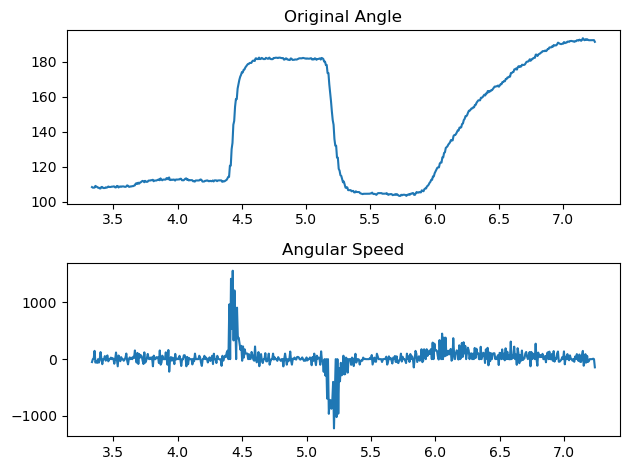

In [43]:
# Assuming you have 'time' and 'angle' columns in your DataFrame
time = df_angle['time']
angles = df_angle['angle_0']

# Plot the original angle and the calculated angular speed
plt.subplot(2, 1, 1)
plt.plot(time, angles, label='Angle')
plt.title('Original Angle')

plt.subplot(2, 1, 2)
# Since the differentiation reduces the length by 1, we plot angular speed with respect to the original time
plt.plot(time[:-1], angular_speed, label='Angular Speed')
plt.title('Angular Speed')

plt.tight_layout()
plt.show()

In [26]:
# Create a Line Graph
fig = go.Figure()

# Add traces for each column
for column in df.columns[1:]:
    fig.add_trace(go.Scatter(x=df['Index'], y=df[column], mode='lines', name=column))

# Update layout
fig.update_layout(
    title='Line Graph from DataFrame Columns',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Values'),
)

# Show the plot
fig.show()

NameError: name 'go' is not defined

In [230]:
measure

from skimage.measure import label, regionprops
from skimage.morphology import dilation, disk

# Open the video file
# cap = cv2.VideoCapture("../IMG_7102.MOV")
#
# cap.set(cv2.CAP_PROP_POS_FRAMES, 500)
# if not cap.isOpened():
#     print("Error: Could not open video file.")
#     exit()
#
# # Get the frames per second (fps) of the video
# fps = cap.get(cv2.CAP_PROP_FPS)
#
# # Create a window to display the frames
# cv2.namedWindow('Video Preview', cv2.WINDOW_NORMAL)
#
#
#
#
# while True:
#     ret, frame = cap.read()
#
#     if not ret:
#         break
#
#     frame_work  = frame.copy()
#     frame_work = main_function(frame_work)
#     cv2.imshow('Video Preview', frame_work)
#
#
#     if cv2.waitKey(int(1000 / fps)) & 0xFF == 27:
#         break

# cap.release()
# cv2.destroyAllWindows()


In [141]:
# import time, numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# plt.imshow(frame_work)

In [142]:
# stats

In [143]:
# marker_yellow = (frameLab[:, :, 1] > 80) & (frameLab[:, :, 1] < 120) & (frameLab[:, :, 2] > 80) & (frameLab[:, :, 2] < 110)
# plt.imshow(marker_yellow)

[ WARN:0@140682.915] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@140682.915] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin80 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@140682.915] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@140682.915] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/

IndexError: list index out of range

In [ ]:
point_per_frame[0]

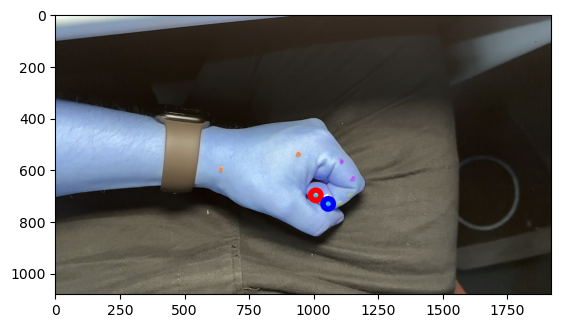

In [28]:
# import time, numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# plt.imshow(frame_work)

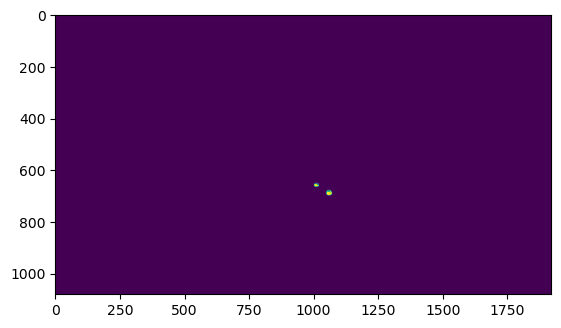

In [64]:
marker_yellow = (frameLab[:, :, 1] > 80) & (frameLab[:, :, 1] < 120) & (frameLab[:, :, 2] > 80) & (frameLab[:, :, 2] < 110)
plt.imshow(marker_yellow)

In [410]:
import pandas as pd

# Sample DataFrame
data = {'value': [1, 4, 10, 15, 2, 7, 3, 8, 12, 6]}
df = pd.DataFrame(data)

# Define a custom filter function
def filter_extremas(window):
    threshold = 10  # Set your threshold for extreme values
    return window.mask((window < threshold) | (window > 100), other=pd.NA)

# Apply the rolling filter using the custom function
window_size = 3  # Set the size of the rolling window
df['filtered_value'] = df['value'].rolling(window=window_size).apply(filter_extremas, raw=False)

print(df)


TypeError: cannot convert the series to <class 'float'>

In [411]:
import pandas as pd

# Sample DataFrame
data = {'value': [1, 4, 10, 15, 2, 7, 3, 8, 12, 6]}
df = pd.DataFrame(data)

# Define a custom filter function
def filter_extremas(window):
    threshold = 10  # Set your threshold for extreme values
    return window.apply(lambda x: x if threshold <= x <= 100 else pd.NA)

# Apply the rolling filter using the custom function
window_size = 3  # Set the size of the rolling window
df['filtered_value'] = df['value'].rolling(window=window_size).apply(filter_extremas, raw=False)

print(df)


TypeError: cannot convert the series to <class 'float'>

In [413]:
df.rolling(5,center = True,axis =0).apply(lambda x: sum(sorted(x)[1:4]))

,value
0,NaN
1,NaN
2,16.0
3,21.0
4,20.0
5,18.0
6,18.0
7,21.0
8,NaN
9,NaN
